# Ejercicio - Clasificación

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ja.meza@profesor.duoc.cl

**Fecha de Creación:** Abril de 2025

**Versión:** 1.0  

---


## Descripción


Este notebook está destinado a ressolver el primer modelo de predicción sobre una variable discreta usando **DecisionTreeClassifier**.

---



## Requisitos del ejercicio


+ Deberá considerar la interpretación, en el negocio, de la matriz de confusión.
+ Recuerde que cada gráfico que vaya a generar deberá contar con su correspondiente interpretación.

El modelo debe ser:

+ Creado
+ Entrenado
+ Evaluado

---

# Objetivo

**Predicción de rotación de empleados en una empresa de servicios tecnológicos**

Una empresa de servicios TI quiere desarrollar un modelo que le permita predecir si un empleado tiene alta probabilidad de renunciar (rotación voluntaria).

El objetivo es anticiparse a la pérdida de talento y tomar decisiones de retención.

In [1]:
!wget https://raw.githubusercontent.com/JaznaLaProfe/Mineria_de_datos/master/datos/data_empleados_renuncia.csv

--2025-04-24 21:10:13--  https://raw.githubusercontent.com/JaznaLaProfe/Mineria_de_datos/master/datos/data_empleados_renuncia.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 158907 (155K) [text/plain]
Saving to: ‘data_empleados_renuncia.csv’

data_empleados_renu 100%[===================>] 155.18K  --.-KB/s    in 0.1s    

2025-04-24 21:10:14 (1.01 MB/s) - ‘data_empleados_renuncia.csv’ saved [158907/158907]



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score,  classification_report

In [3]:
data = pd.read_csv("data_empleados_renuncia.csv")
data

,edad,antiguedad_anios,nivel_educacional,area,satisfaccion,renuncia
0,58,1.6,postgrado,TI,7.3,1
1,48,1.7,tecnico,Soporte,7.1,0
2,34,4.2,tecnico,Soporte,4.5,0
3,27,7.6,profesional,TI,4.6,0
4,40,9.0,tecnico,Recursos Humanos,3.3,0
...,...,...,...,...,...,...
4995,38,1.7,tecnico,TI,5.4,0
4996,24,6.7,postgrado,Ventas,4.2,1
4997,42,6.1,profesional,Recursos Humanos,3.9,1
4998,49,6.4,tecnico,Recursos Humanos,3.4,1


# **Tipo de datos que tenemos en la data empleados renuncia**

In [4]:
print(data.dtypes)

edad                   int64
antiguedad_anios     float64
nivel_educacional     object
area                  object
satisfaccion         float64
renuncia               int64
dtype: object


# **Cuantos nulos tenemos en cada celda**

In [5]:
print(data.isnull().sum())

edad                 0
antiguedad_anios     0
nivel_educacional    0
area                 0
satisfaccion         0
renuncia             0
dtype: int64


# **Verificamos cuantos duplicados tenemos en la base de datos**

In [6]:
print(data.duplicated().sum())

2


**Procedemos a copiar nuestra base de datos y mostrar cuales son los valores duplicados**

In [22]:
db_copy = data.copy()
duplicados = db_copy[db_copy.duplicated()] #Se podria colocar keep=False para ver los datos originales con los que se duplican
duplicados



,edad,antiguedad_anios,nivel_educacional,area,satisfaccion,renuncia
3648,54,6.8,tecnico,Recursos Humanos,5.7,0
4108,56,1.0,profesional,Ventas,8.0,1


**Procedemos a eliminar los duplicados**

In [10]:
db_copy = db_copy.drop_duplicates()

print("Duplicados:",db_copy.duplicated().sum())

Duplicados: 0


# **Analisis descriptivo de las variables numericas**

In [8]:
print(data.describe())

              edad  antiguedad_anios  satisfaccion     renuncia
count  5000.000000        5000.00000   5000.000000  5000.000000
mean     40.201400           4.89978      5.593940     0.345800
std      11.788818           2.87101      2.585525     0.475676
min      20.000000           0.00000      1.000000     0.000000
25%      30.000000           2.40000      3.400000     0.000000
50%      40.000000           4.80000      5.600000     0.000000
75%      51.000000           7.30000      7.800000     1.000000
max      60.000000          10.00000     10.000000     1.000000


# **Distribución de Valores Únicos en Variables Categóricas**

In [26]:
print(data['nivel_educacional'].value_counts())

print("\n")


print(data['area'].value_counts())


nivel_educacional
tecnico        2008
profesional    1980
postgrado      1012
Name: count, dtype: int64


area
Recursos Humanos    1265
TI                  1264
Soporte             1242
Ventas              1229
Name: count, dtype: int64


# **Contamos cuantos nulos tenemos en cada columna**

In [11]:

print(db_copy.isnull().sum())

edad                 0
antiguedad_anios     0
nivel_educacional    0
area                 0
satisfaccion         0
renuncia             0
dtype: int64


Como no tenemos nulos no los tratamos en esta ocasion

# **Codificar las variables categorias (nivel_educacional y area)**

In [12]:
#Codificar variables categoricas
db_copy = pd.get_dummies(db_copy, columns=['nivel_educacional', 'area'], drop_first=True)


db_copy

,edad,antiguedad_anios,satisfaccion,renuncia,nivel_educacional_profesional,nivel_educacional_tecnico,area_Soporte,area_TI,area_Ventas
0,58,1.6,7.3,1,False,False,False,True,False
1,48,1.7,7.1,0,False,True,True,False,False
2,34,4.2,4.5,0,False,True,True,False,False
3,27,7.6,4.6,0,True,False,False,True,False
4,40,9.0,3.3,0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...
4995,38,1.7,5.4,0,False,True,False,True,False
4996,24,6.7,4.2,1,False,False,False,False,True
4997,42,6.1,3.9,1,True,False,False,False,False
4998,49,6.4,3.4,1,False,True,False,False,False


Definicion de variable objetivo y la separacion del conjunto de datos

In [13]:
#La X son las variables predictoras
X = db_copy.drop('renuncia', axis=1)
#La Y es nuestra variable objetivo
y = db_copy['renuncia']

# Separar en entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Creacion del modelo de arbol de decisión**

In [14]:
modelo_arbol = DecisionTreeClassifier(criterion="entropy",max_depth=4,random_state=42)


Entrenamiento del modelo

In [15]:
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

Evaluacion del modelo entrenamiento y prueba

In [16]:

y_train_pred = modelo_arbol.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)


y_test_pred = modelo_arbol.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Accuracy en entrenamiento: {train_accuracy:.4f}")
print(f"Accuracy en test: {test_accuracy:.4f}")


Accuracy en entrenamiento: 0.7624
Accuracy en test: 0.7720


Visualizacion del arbol de decisión

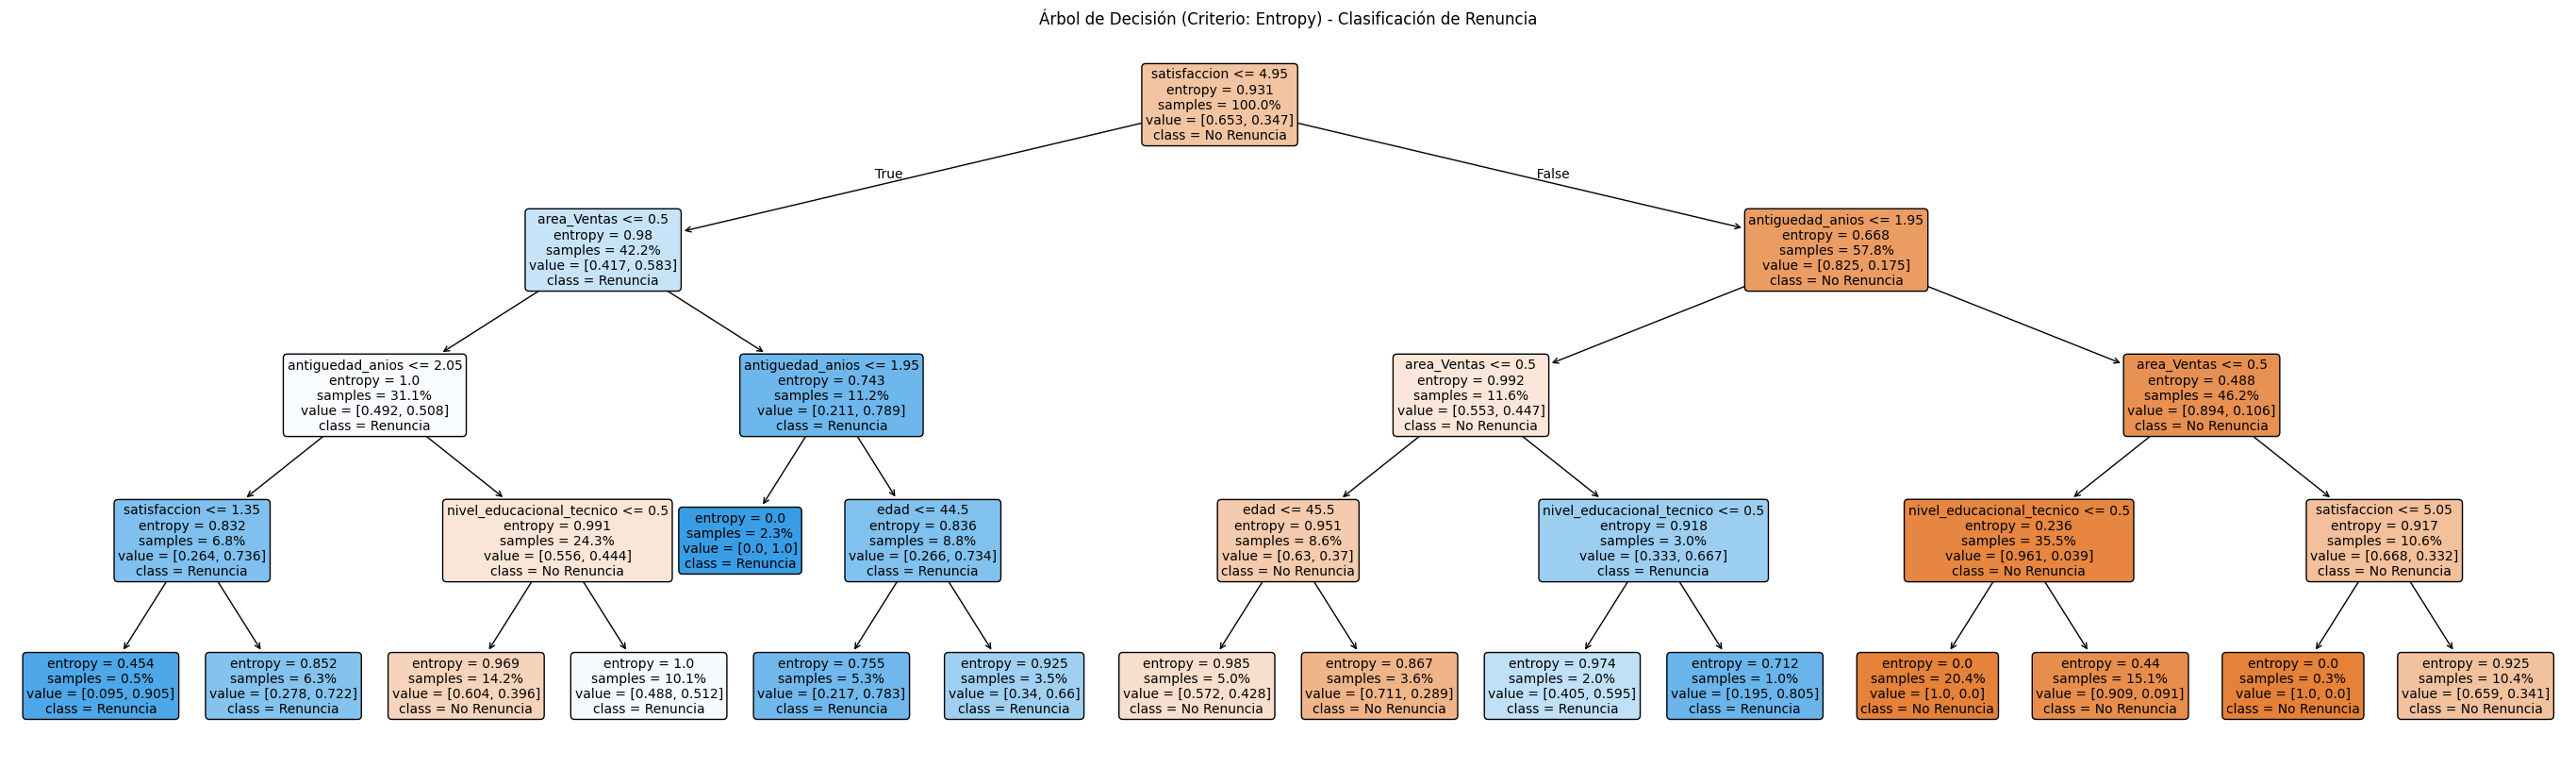

In [17]:
plt.figure(figsize=(35,10))
plot_tree(
    modelo_arbol,
    feature_names=X.columns,
    class_names=["No Renuncia", "Renuncia"],
    label="all",
    proportion=True,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Árbol de Decisión (Criterio: Entropy) - Clasificación de Renuncia")
plt.show()

# **Evaluacion del modelo con el reporte de clasificacion**

In [18]:
# Predicciones del modelo en el set de test
y_pred = modelo_arbol.predict(X_test)

# Métricas de evaluación
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["No Renuncia", "Renuncia"]))


Classification Report:
              precision    recall  f1-score   support

 No Renuncia       0.80      0.87      0.83       659
    Renuncia       0.70      0.59      0.64       341

    accuracy                           0.77      1000
   macro avg       0.75      0.73      0.74      1000
weighted avg       0.77      0.77      0.77      1000



# **Matriz de Confusión**

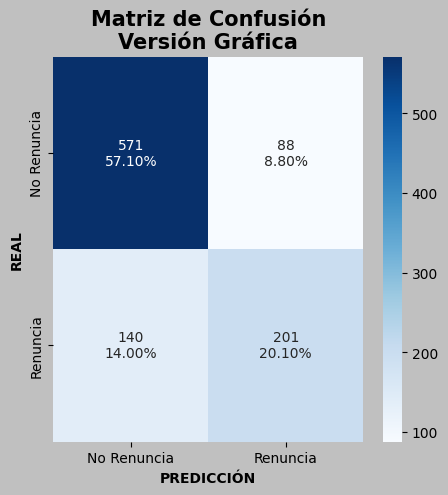

In [31]:
# Matriz de confusión de forma gráfica
matriz = confusion_matrix(y_test, modelo_arbol.predict(X_test))
plt.figure(figsize=(5,5), facecolor='silver')
# Configuración de las clases
clases = ["No Renuncia", "Renuncia"]
group_counts = ["{0:0.0f}".format(value) for value in matriz.flatten()]
# Calcular los porcentajes
group_percentages = ["{0:.2%}".format(value) for value in matriz.flatten()/matriz.sum()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
# Genera la gráfica
sns.heatmap(matriz, annot=labels, fmt='', cmap='Blues', xticklabels=clases, yticklabels=clases)
plt.title("Matriz de Confusión\nVersión Gráfica", fontsize=15, fontweight="bold")
plt.xlabel("PREDICCIÓN", fontsize=10, fontweight="bold")
plt.ylabel("REAL", fontsize=10, fontweight="bold")
plt.show()